In [1]:
#sector performance

import pandas as pd

# Ld stock price data
stocks_df = pd.read_csv(r'C:\Users\LENOVO\Desktop\Newfolder\project2\output\all_stocks.csv')


print(stocks_df.head())


       Ticker    close                 date    high      low    month    open  \
0        SBIN   602.95  2023-10-03 05:30:00   604.9   589.60  2023-10   596.6   
1  BAJFINANCE  7967.60  2023-10-03 05:30:00  7975.5  7755.00  2023-10  7780.8   
2       TITAN  3196.25  2023-10-03 05:30:00  3212.5  3114.40  2023-10  3148.8   
3         ITC   439.75  2023-10-03 05:30:00   442.9   439.25  2023-10   441.0   
4         TCS  3513.85  2023-10-03 05:30:00  3534.2  3480.10  2023-10  3534.2   

     volume  
0  15322196  
1    944555  
2   1007308  
3   7481883  
4   1948148  


In [2]:
import pandas as pd

# Load sector data
sectors_df = pd.read_csv(r'C:\Users\LENOVO\Desktop\Newfolder\project2\Sectordata1.csv')

print(sectors_df.head())


             COMPANY         sector                         Symbol
0  ADANI ENTERPRISES  MISCELLANEOUS  ADANI ENTERPRISES: ADANIGREEN
1  ADANI PORTS & SEZ  MISCELLANEOUS  ADANI PORTS & SEZ: ADANIPORTS
2   APOLLO HOSPITALS  MISCELLANEOUS   APOLLO HOSPITALS: APOLLOHOSP
3       ASIAN PAINTS         PAINTS       ASIAN PAINTS: ASIANPAINT
4          AXIS BANK        BANKING            AXIS BANK: AXISBANK


In [3]:
# Sort the data to calculate daily returns correctly
stocks_df['date'] = pd.to_datetime(stocks_df['date'])
stocks_df = stocks_df.sort_values(by=['Ticker', 'date'])

# Calculate daily returns: (Close - Previous Close) / Previous Close
stocks_df['Daily_Return'] = stocks_df.groupby('Ticker')['close'].pct_change()

print(stocks_df[['Ticker', 'date', 'close', 'Daily_Return']].head(10))

       Ticker                date    close  Daily_Return
24   ADANIENT 2023-10-03 05:30:00  2387.25           NaN
74   ADANIENT 2023-10-04 05:30:00  2464.95      0.032548
124  ADANIENT 2023-10-05 05:30:00  2466.35      0.000568
174  ADANIENT 2023-10-06 05:30:00  2478.10      0.004764
224  ADANIENT 2023-10-09 05:30:00  2442.60     -0.014325
274  ADANIENT 2023-10-10 05:30:00  2498.30      0.022804
324  ADANIENT 2023-10-11 05:30:00  2488.60     -0.003883
374  ADANIENT 2023-10-12 05:30:00  2506.35      0.007133
424  ADANIENT 2023-10-13 05:30:00  2454.55     -0.020668
474  ADANIENT 2023-10-16 05:30:00  2429.35     -0.010267


In [4]:
# Calculate average yearly return for each stock
yearly_return_df = stocks_df.groupby(['Ticker'])['Daily_Return'].mean().reset_index()
yearly_return_df.rename(columns={'Daily_Return': 'Avg_Yearly_Return'}, inplace=True)

print(yearly_return_df.head())

       Ticker  Avg_Yearly_Return
0    ADANIENT           0.000182
1  ADANIPORTS           0.001455
2  APOLLOHOSP           0.001173
3  ASIANPAINT          -0.000794
4    AXISBANK           0.000450


In [5]:
# Load sector data
sectors_df = pd.read_csv(r'C:\Users\LENOVO\Desktop\Newfolder\project2\Sectordata1.csv')

# Extract ticker from 'Symbol' column (text after the colon and space)
sectors_df['Ticker'] = sectors_df['Symbol'].str.split(': ').str[-1].str.strip()

# Keep only necessary columns
sectors_df = sectors_df[['Ticker', 'sector']]
sectors_df.rename(columns={'sector': 'Sector'}, inplace=True)

print(sectors_df.head())


       Ticker         Sector
0  ADANIGREEN  MISCELLANEOUS
1  ADANIPORTS  MISCELLANEOUS
2  APOLLOHOSP  MISCELLANEOUS
3  ASIANPAINT         PAINTS
4    AXISBANK        BANKING


In [6]:
#merging the yearl returns and sector df

merged_df = pd.merge(yearly_return_df, sectors_df, on="Ticker", how = 'left')

print(merged_df.head())


       Ticker  Avg_Yearly_Return         Sector
0    ADANIENT           0.000182            NaN
1  ADANIPORTS           0.001455  MISCELLANEOUS
2  APOLLOHOSP           0.001173  MISCELLANEOUS
3  ASIANPAINT          -0.000794         PAINTS
4    AXISBANK           0.000450        BANKING


In [7]:
import pandas as pd

# Group by Sector and Ticker
sector_avg_returns = merged_df.groupby(['Ticker', 'Sector'])['Avg_Yearly_Return'].mean().reset_index()

# Optional: Convert to percentage
sector_avg_returns['Avg_Yearly_Return'] *= 100

# Save to CSV
output_path = r'C:\Users\LENOVO\Desktop\Newfolder\project2\output\sector_avg_returns.csv'
sector_avg_returns.to_csv(output_path, index=False)

print("CSV file saved successfully at:", output_path)


CSV file saved successfully at: C:\Users\LENOVO\Desktop\Newfolder\project2\output\sector_avg_returns.csv


In [8]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


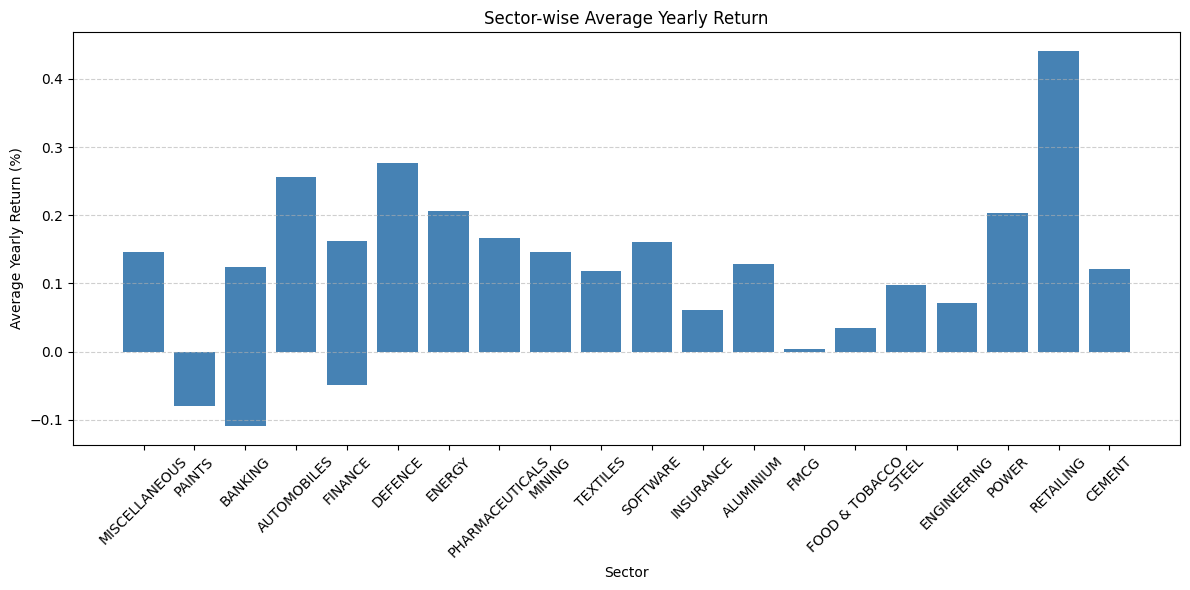

In [9]:
import matplotlib.pyplot as plt

# Sort sectors by performance (optional for better visuals)
#sector_avg_returns = sector_avg_returns.sort_values(by='Avg_Yearly_Return', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(sector_avg_returns['Sector'], sector_avg_returns['Avg_Yearly_Return'], color='steelblue')

# Add labels and title
plt.xlabel('Sector')
plt.ylabel('Average Yearly Return (%)')
plt.title('Sector-wise Average Yearly Return')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Show plot
plt.show()